In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Dataset = pd.read_csv("/content/UberDataset.csv") # Import CSV Data set

In [ ]:
Dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
Dataset.shape

(1156, 7)

In [ ]:
Dataset.info() # information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


***Data Preprocessing ***


In [ ]:
# Replace nall values
Dataset['PURPOSE'].fillna("not", inplace = True)

<ipython-input-52-93f54f401eaf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['PURPOSE'].fillna("not", inplace = True)


In [ ]:

Dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
Dataset['START_DATE'] = pd.to_datetime(Dataset['START_DATE'],  errors = 'coerce')
Dataset['END_DATE'] = pd.to_datetime(Dataset['END_DATE'],  errors = 'coerce')

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [ ]:
from datetime import datetime # Correct the import statement from 'datatime' to 'datetime'
Dataset['date'] = pd.DatetimeIndex(Dataset['START_DATE']).date # Change 'Date' to 'date' to access the date attribute
Dataset['time'] = pd.DatetimeIndex(Dataset['START_DATE']).hour # Change 'Date' to 'Time' to access the date attribute

In [ ]:
Dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [ ]:
Dataset['day_night'] = pd.cut(x=Dataset['time'],bins = [0,10,15,19,24],labels=['morning','Afternoon','Evening','Night'])

In [ ]:
Dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [ ]:
Dataset.dropna(inplace=True)

In [ ]:
Dataset.shape

(413, 10)

Data Visualazation



(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

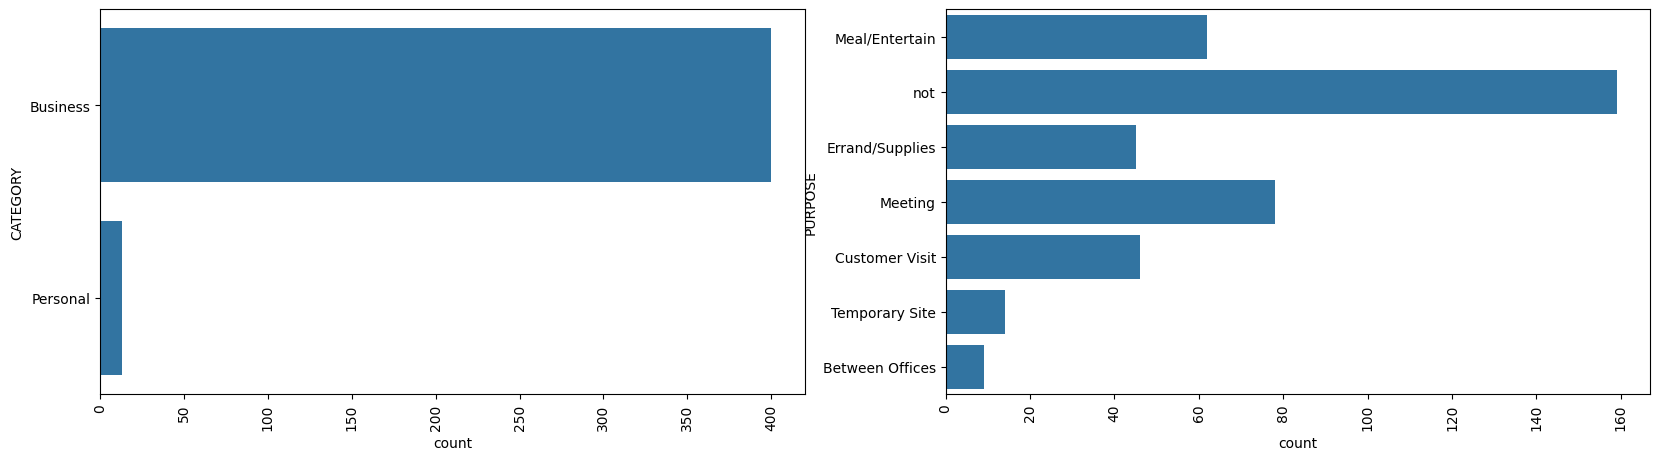

In [ ]:
## create chart for Analysing data
plt.figure(figsize = (20,5))
plt.subplot(1,2,1,)
sns.countplot(Dataset['CATEGORY'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2,)
sns.countplot(Dataset['PURPOSE'])
plt.xticks(rotation = 90)

<Axes: xlabel='count', ylabel='day_night'>

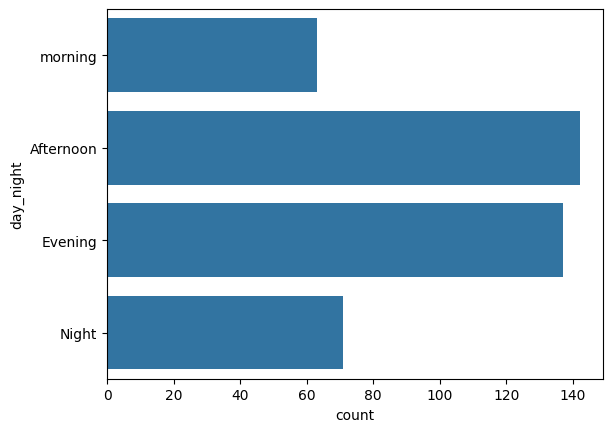

In [ ]:
sns.countplot(Dataset['day_night'])

In [ ]:
Dataset['Month'] = pd.DatetimeIndex(Dataset['START_DATE']).month # Extract month from START_DATE
Month_lable = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'} # Assign string name to months
Dataset['Month'] = Dataset['Month'].map(Month_lable) # Correctly apply the mapping to the 'Month' column
mon = Dataset['Month'].value_counts(sort=False) # Count occurrences of each month using value_counts

In [ ]:
Dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'value count')]

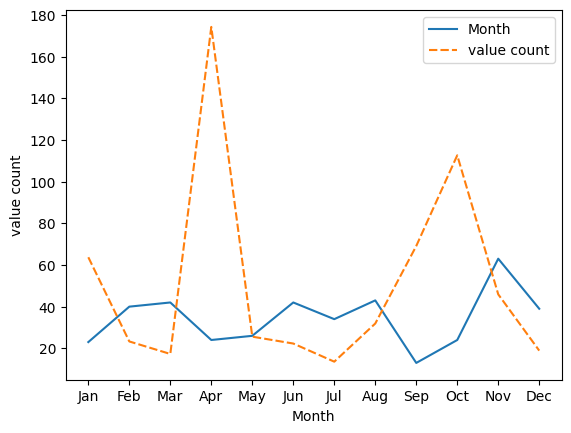

In [ ]:
df = pd.DataFrame({
    "Month": mon.values,   #Each months Total count
    "value count":Dataset.groupby ('Month',sort = False)['MILES'].max()    #Each month max Miles value
    })
p = sns.lineplot (data=df)     # Makes line plot of the data
p.set(xlabel='Month', ylabel='value count')   # set Axis lables

In [ ]:
Dataset['Day'] = Dataset.START_DATE.dt.weekday # creat weekday column

data_labes = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
Dataset['Day'] = Dataset['Day'].map(data_labes)

In [ ]:
Dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


Text(0, 0.5, 'Count')

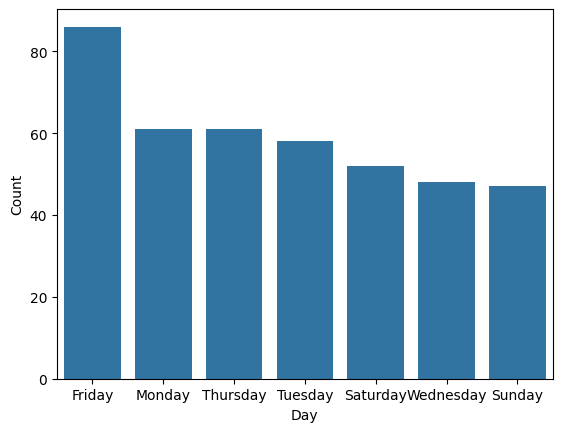

In [ ]:
day_label = Dataset['Day'].value_counts()

sns.barplot(x=day_label. index, y=day_label)
plt.xlabel('Day')
plt.ylabel('Count')

In [ ]:
Dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


<Axes: ylabel='MILES'>

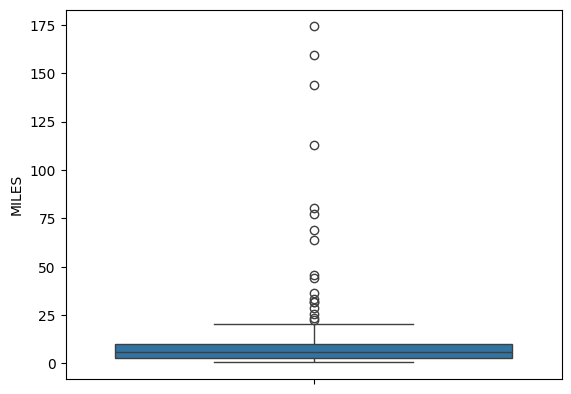

In [ ]:
sns.boxplot(Dataset['MILES'])

<Axes: ylabel='MILES'>

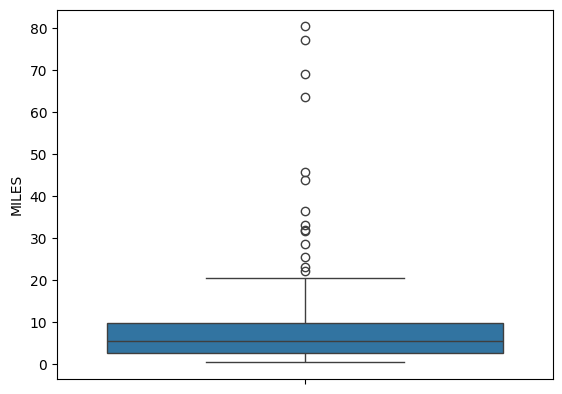

In [ ]:
sns.boxplot(Dataset[Dataset['MILES'] < 100]['MILES'])

<ipython-input-91-3d705f1305d8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset[Dataset['MILES'] < 40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

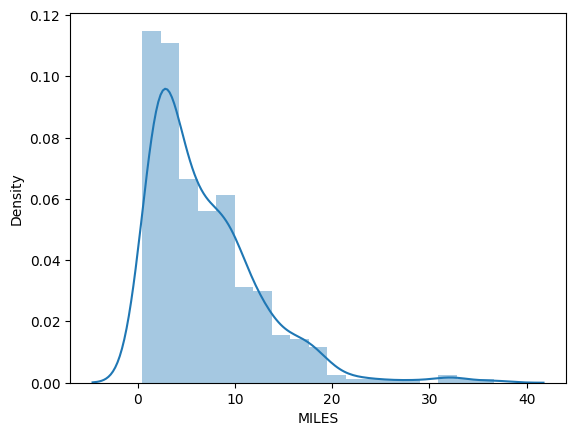

In [ ]:
sns.distplot(Dataset[Dataset['MILES'] < 40]['MILES'])